Train DQN with the simulated sepsis data

In [1]:
#import necessary libraries
import d3rlpy
import pickle
import numpy as np
from typing import List, Dict

# Custom evaluator to track mean and std of rewards over multiple trials
class MultiTrialEvaluator(d3rlpy.metrics.EvaluatorProtocol):
    """Custom evaluator that runs multiple trials and tracks mean/std of rewards."""
    
    def __init__(self, env, n_trials=10, max_steps=100):
        """
        Args:
            env: The environment to evaluate on
            n_trials: Number of trials to run per evaluation
            max_steps: Maximum steps per trial
        """
        self.env = env
        self.n_trials = n_trials
        self.max_steps = max_steps
        # Store history of all evaluations
        self.reward_means: List[float] = []
        self.reward_stds: List[float] = []
        self.epoch_numbers: List[int] = []
        
    def __call__(self, algo, dataset):
        """Run evaluation and return mean reward."""
        trial_rewards = []
        
        for trial in range(self.n_trials):
            obs, info = self.env.reset()
            episode_reward = 0
            done = False
            step_count = 0
            
            while not done and step_count < self.max_steps:
                # Get action from current policy
                action = algo.predict(obs.reshape(1, -1))[0]
                
                # Take step in environment
                next_obs, reward, terminated, truncated, info = self.env.step(action)
                
                episode_reward += reward
                obs = next_obs
                done = terminated or truncated
                step_count += 1
            
            trial_rewards.append(episode_reward)
        
        # Calculate statistics
        mean_reward = np.mean(trial_rewards)
        std_reward = np.std(trial_rewards)
        
        # Store in history
        self.reward_means.append(mean_reward)
        self.reward_stds.append(std_reward)
        
        # Return mean as the metric value (this gets logged by d3rlpy)
        return mean_reward
    
    def get_results(self) -> Dict[str, List[float]]:
        """Get all recorded means and stds."""
        return {
            'means': self.reward_means,
            'stds': self.reward_stds,
            'epochs': list(range(1, len(self.reward_means) + 1))
        }

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
c:\Users\liuji\Dropbox\HomeSweetHome\GWU\Yalun Stat\2025 Fall\Project1\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#load the dataset
with open("sepsis_data_set_1000ep_random_20251005_202927.pkl",'rb') as f:
    dataset = pickle.load(f)

# Set up the sepsis environment for evaluation
from gym_sepsis.envs.sepsis_env import SepsisEnv
env = SepsisEnv(verbose=False)

# setup algorithm
dqn = d3rlpy.algos.DQNConfig().create()

# Create custom evaluator that runs 10 trials per epoch
custom_evaluator = MultiTrialEvaluator(env, n_trials=10, max_steps=100)

# start offline training (updated for newer d3rlpy versions)
train_result = dqn.fit(
   dataset,
   n_steps=100000,
   n_steps_per_epoch=10000,
   # scorers parameter has been deprecated, use evaluators instead
   evaluators={
       "multi_trial_mean_reward": custom_evaluator,
   },
)

2025-10-05 21:21.39 [info     ] dataset info                   dataset_info=DatasetInfo(observation_signature=Signature(dtype=[dtype('float32')], shape=[(46,)]), action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]), reward_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]), action_space=<ActionSpace.DISCRETE: 2>, action_size=24)
2025-10-05 21:21.39 [debug    ] Building models...            
2025-10-05 21:21.40 [debug    ] Models have been built.       
2025-10-05 21:21.40 [info     ] Directory is created at d3rlpy_logs\DQN_20251005212140
2025-10-05 21:21.40 [info     ] Parameters                     params={'observation_shape': [46], 'action_size': 24, 'config': {'type': 'dqn', 'params': {'batch_size': 32, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none', 'params': {}}, 'compile_graph': False, 'learning_rate': 6.25e-05, 'optim_factory': {'type': 'adam', 'params': {'c

Epoch 1/10: 100%|██████████| 10000/10000 [00:26<00:00, 378.95it/s, loss=1.48]


2025-10-05 21:22.12 [info     ] DQN_20251005212140: epoch=1 step=10000 epoch=1 metrics={'time_sample_batch': 0.0002946024179458618, 'time_algorithm_update': 0.002219678020477295, 'loss': 1.4754802056849934, 'time_step': 0.0026157732486724854, 'multi_trial_mean_reward': 12.0} step=10000
2025-10-05 21:22.12 [info     ] Model parameters are saved to d3rlpy_logs\DQN_20251005212140\model_10000.d3


Epoch 2/10: 100%|██████████| 10000/10000 [00:26<00:00, 380.39it/s, loss=1.06]


2025-10-05 21:22.44 [info     ] DQN_20251005212140: epoch=2 step=20000 epoch=2 metrics={'time_sample_batch': 0.00028982400894165037, 'time_algorithm_update': 0.002214227056503296, 'loss': 1.0593771978063509, 'time_step': 0.002603306555747986, 'multi_trial_mean_reward': 12.0} step=20000
2025-10-05 21:22.44 [info     ] Model parameters are saved to d3rlpy_logs\DQN_20251005212140\model_20000.d3


Epoch 3/10: 100%|██████████| 10000/10000 [00:26<00:00, 381.43it/s, loss=0.561]


2025-10-05 21:23.17 [info     ] DQN_20251005212140: epoch=3 step=30000 epoch=3 metrics={'time_sample_batch': 0.00030284929275512694, 'time_algorithm_update': 0.0021904539346694948, 'loss': 0.5606581603689119, 'time_step': 0.002597698187828064, 'multi_trial_mean_reward': 12.0} step=30000
2025-10-05 21:23.17 [info     ] Model parameters are saved to d3rlpy_logs\DQN_20251005212140\model_30000.d3


Epoch 4/10: 100%|██████████| 10000/10000 [00:26<00:00, 380.25it/s, loss=0.405]


2025-10-05 21:23.50 [info     ] DQN_20251005212140: epoch=4 step=40000 epoch=4 metrics={'time_sample_batch': 0.00030264313220977786, 'time_algorithm_update': 0.002200721001625061, 'loss': 0.4044822290090844, 'time_step': 0.002607111144065857, 'multi_trial_mean_reward': 15.0} step=40000
2025-10-05 21:23.50 [info     ] Model parameters are saved to d3rlpy_logs\DQN_20251005212140\model_40000.d3


Epoch 5/10: 100%|██████████| 10000/10000 [00:26<00:00, 379.13it/s, loss=0.35]


2025-10-05 21:24.23 [info     ] DQN_20251005212140: epoch=5 step=50000 epoch=5 metrics={'time_sample_batch': 0.00030255193710327147, 'time_algorithm_update': 0.0022090413093566893, 'loss': 0.3495312867366709, 'time_step': 0.0026147238731384277, 'multi_trial_mean_reward': 12.0} step=50000
2025-10-05 21:24.23 [info     ] Model parameters are saved to d3rlpy_logs\DQN_20251005212140\model_50000.d3


Epoch 6/10: 100%|██████████| 10000/10000 [00:26<00:00, 382.64it/s, loss=0.338]


2025-10-05 21:24.55 [info     ] DQN_20251005212140: epoch=6 step=60000 epoch=6 metrics={'time_sample_batch': 0.00029820079803466795, 'time_algorithm_update': 0.002190543484687805, 'loss': 0.33755513779371976, 'time_step': 0.002591957139968872, 'multi_trial_mean_reward': 15.0} step=60000
2025-10-05 21:24.55 [info     ] Model parameters are saved to d3rlpy_logs\DQN_20251005212140\model_60000.d3


Epoch 7/10: 100%|██████████| 10000/10000 [00:26<00:00, 381.43it/s, loss=0.338]


2025-10-05 21:25.28 [info     ] DQN_20251005212140: epoch=7 step=70000 epoch=7 metrics={'time_sample_batch': 0.0002983109474182129, 'time_algorithm_update': 0.0021970197916030883, 'loss': 0.3376818349752575, 'time_step': 0.0025987315177917482, 'multi_trial_mean_reward': 12.0} step=70000
2025-10-05 21:25.28 [info     ] Model parameters are saved to d3rlpy_logs\DQN_20251005212140\model_70000.d3


Epoch 8/10: 100%|██████████| 10000/10000 [00:26<00:00, 375.88it/s, loss=0.337]


2025-10-05 21:26.02 [info     ] DQN_20251005212140: epoch=8 step=80000 epoch=8 metrics={'time_sample_batch': 0.00031090977191925047, 'time_algorithm_update': 0.00222284471988678, 'loss': 0.33690390453133734, 'time_step': 0.002636338996887207, 'multi_trial_mean_reward': 12.0} step=80000
2025-10-05 21:26.02 [info     ] Model parameters are saved to d3rlpy_logs\DQN_20251005212140\model_80000.d3


Epoch 9/10: 100%|██████████| 10000/10000 [00:26<00:00, 382.52it/s, loss=0.336]


2025-10-05 21:26.34 [info     ] DQN_20251005212140: epoch=9 step=90000 epoch=9 metrics={'time_sample_batch': 0.0002957988977432251, 'time_algorithm_update': 0.0021948065280914305, 'loss': 0.3357446334006265, 'time_step': 0.002592845582962036, 'multi_trial_mean_reward': 15.0} step=90000
2025-10-05 21:26.34 [info     ] Model parameters are saved to d3rlpy_logs\DQN_20251005212140\model_90000.d3


Epoch 10/10: 100%|██████████| 10000/10000 [00:34<00:00, 290.69it/s, loss=0.299]


2025-10-05 21:27.15 [info     ] DQN_20251005212140: epoch=10 step=100000 epoch=10 metrics={'time_sample_batch': 0.0003746411085128784, 'time_algorithm_update': 0.0028974665880203247, 'loss': 0.29865639435574415, 'time_step': 0.0034063870429992676, 'multi_trial_mean_reward': 15.0} step=100000
2025-10-05 21:27.15 [info     ] Model parameters are saved to d3rlpy_logs\DQN_20251005212140\model_100000.d3


Training Performance Progress
Epoch      Mean Reward     Std Reward     
------------------------------------------------------------
1          12.00           9.00           
2          12.00           9.00           
3          12.00           9.00           
4          15.00           0.00           
5          12.00           9.00           
6          15.00           0.00           
7          12.00           9.00           
8          12.00           9.00           
9          15.00           0.00           
10         15.00           0.00           


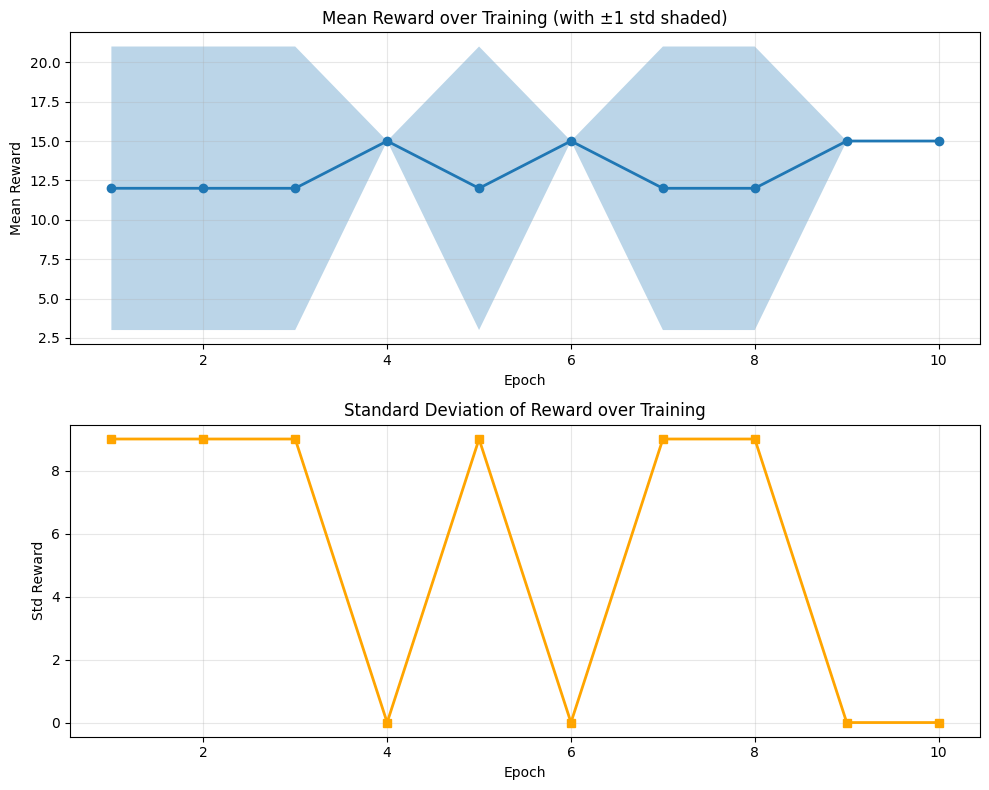


Summary:
  Initial mean reward: 12.00 ± 9.00
  Final mean reward: 15.00 ± 0.00
  Improvement: 3.00
  Best mean reward: 15.00 (Epoch 4)


In [3]:
# Get all evaluation results
results = custom_evaluator.get_results()

print("="*60)
print("Training Performance Progress")
print("="*60)
print(f"{'Epoch':<10} {'Mean Reward':<15} {'Std Reward':<15}")
print("-"*60)
for epoch, mean, std in zip(results['epochs'], results['means'], results['stds']):
    print(f"{epoch:<10} {mean:<15.2f} {std:<15.2f}")
print("="*60)

# Optional: Plot the results
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot mean rewards
ax1.plot(results['epochs'], results['means'], marker='o', linewidth=2, markersize=6)
ax1.fill_between(
    results['epochs'], 
    np.array(results['means']) - np.array(results['stds']),
    np.array(results['means']) + np.array(results['stds']),
    alpha=0.3
)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean Reward')
ax1.set_title('Mean Reward over Training (with ±1 std shaded)')
ax1.grid(True, alpha=0.3)

# Plot standard deviations
ax2.plot(results['epochs'], results['stds'], marker='s', color='orange', linewidth=2, markersize=6)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Std Reward')
ax2.set_title('Standard Deviation of Reward over Training')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nSummary:")
print(f"  Initial mean reward: {results['means'][0]:.2f} ± {results['stds'][0]:.2f}")
print(f"  Final mean reward: {results['means'][-1]:.2f} ± {results['stds'][-1]:.2f}")
print(f"  Improvement: {results['means'][-1] - results['means'][0]:.2f}")
print(f"  Best mean reward: {max(results['means']):.2f} (Epoch {results['epochs'][np.argmax(results['means'])]})") 


In [4]:
# Save the evaluation results to a file
import json
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
results_filename = f"training_evaluation_results_{timestamp}.json"

# Add some metadata
results_with_metadata = {
    'metadata': {
        'n_trials_per_epoch': custom_evaluator.n_trials,
        'max_steps_per_trial': custom_evaluator.max_steps,
        'n_steps_total': 100000,
        'n_steps_per_epoch': 10000,
        'timestamp': timestamp
    },
    'results': results
}

with open(results_filename, 'w') as f:
    json.dump(results_with_metadata, f, indent=2)

print(f"Results saved to: {results_filename}")


Results saved to: training_evaluation_results_20251005_215441.json
